# HW3: Regression and Classification

In this assignment you will preprocess the dataset and perform some basic regression and classification tasks. The learning outcome of this part is to know how one can pre-process a real-world dataset and perform a supervised learning task, and to understand some of the fundamental mechanisms behind these tasks.

### Student information
Please provide your information for automatic grading.

In [1]:
STUD_SUID = 'andu7656'
STUD_NAME = 'Antonia Dumitriu'
STUD_EMAIL = 'andu7656@student.su.se'

##  Grading: 

Pass/Fail.

To Pass this HW you need to provide a complete and correct solution, where one minor mistake is allowed. However, if your solution has more minor mistakes or lacks parts entirely or has one or more major mistakes, then you receive a Fail grade.

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

## Important instructions:

Each function you make will be considered during the grading, so it is important to strictly follow input and output instructions stated in the skeleton code.

You must not delete any of the given cells or change the structure of the cells or change the instructions in the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help in grading the assignment. Should you contravene this provision, you will fail the assignment, and no feedback will be given on the part after the contravention.

Some variable names are already given and have random values or empty arrays assigned on them. In this case you should only change the assignments on the variables but keep the names as given.

When you are finished with implementing all the tasks, **clear all outputs, run all cells again** (make sure there is no error) and submit!

Make sure that the results and figures asked are visible for us to grade.

Make sure not to modify the files in the "data" folder in your submission, and not to change the folder structure or the files location, or your submission will not obtain a passing grade.

To ensure consistent results, make sure that every operation in which you can use a random seed has it set to 8. If your process is correct, but the results are wrong due to the seed being wrong, it will be considered a major mistake.

In [2]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

### `Task: Read the datasets using pandas. Use the files called cleveland.data and switzerland.data that you have downloaded in this archive.`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [3]:
# TODO: Check for logical errors or typos
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.

columns = ['age', 'sex', 'cp', 'trestbps','chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] # you can find the column names in the file 'data/heart-disease.names'.
# Select the correct column names for the dataset, as described in the file.
import os

data_dir = os.path.join('..', 'data')
cleveland_path = os.path.join(data_dir, 'cleveland.data')
switzerland_path = os.path.join(data_dir, 'switzerland.data')


cleveland = pd.read_csv(cleveland_path, names=columns, na_values='?')  # change this
test = pd.read_csv(switzerland_path, names=columns, na_values='?')       # change this

# Drop the last five rows from the test dataset
test = test.iloc[:-5]

In [4]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1.0
1,34.0,1.0,4.0,115.0,0.0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1.0
2,36.0,1.0,4.0,110.0,0.0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1.0
3,38.0,0.0,4.0,105.0,0.0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2.0
4,38.0,0.0,4.0,110.0,0.0,0.0,0.0,156.0,0.0,0.0,2.0,NaN,3.0,1.0


In [6]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,4.000000


In [7]:
# if you want to see information about the dataset, uncomment:
test.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,117.000000,117.000000,117.000000,117.000000,117.0,46.000000,116.000000,117.000000,117.000000,117.000000,106.000000,5.000000,66.000000,117.000000
mean,60.316239,0.914530,3.683761,129.957265,0.0,0.086957,0.353448,122.299145,0.435897,0.653846,1.801887,1.600000,5.772727,1.769231
std,88.790013,0.280782,0.702822,22.423200,0.0,0.284885,0.593506,25.759921,0.498007,1.056061,0.623658,0.547723,1.743519,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,50.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,105.000000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,141.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


## *2.* Missing values

### `Task: Produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. The plot must have a name, and the bars must be named using the feature names.`

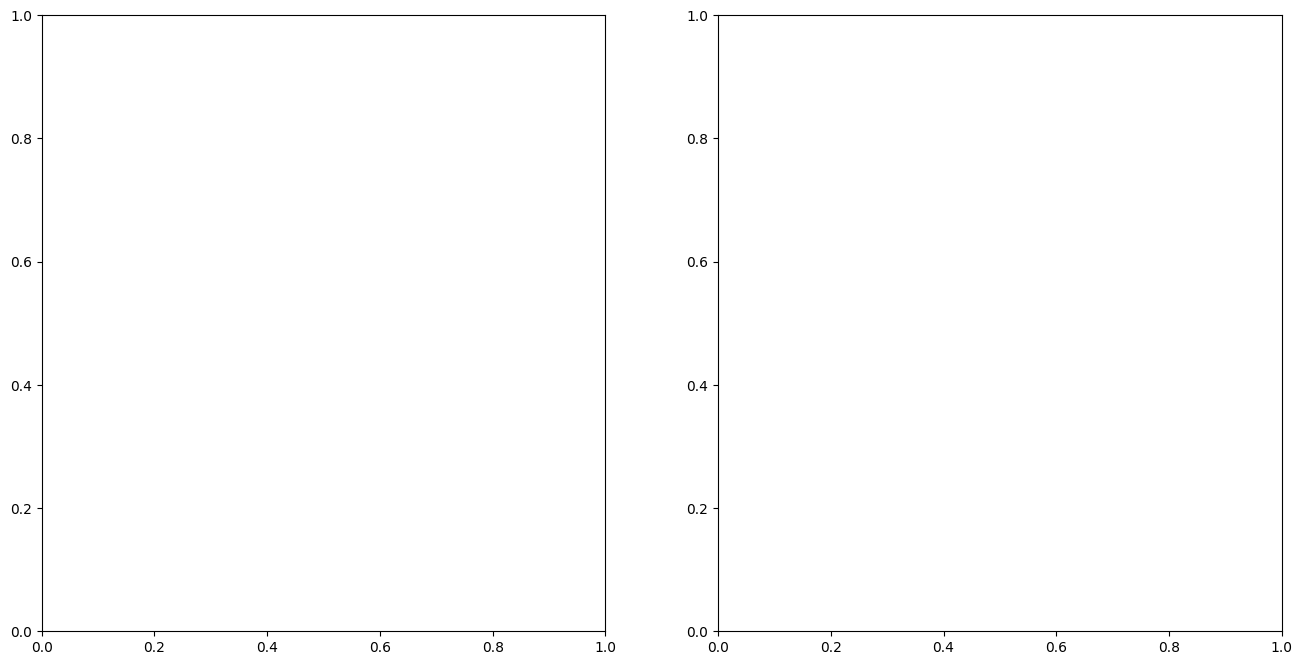

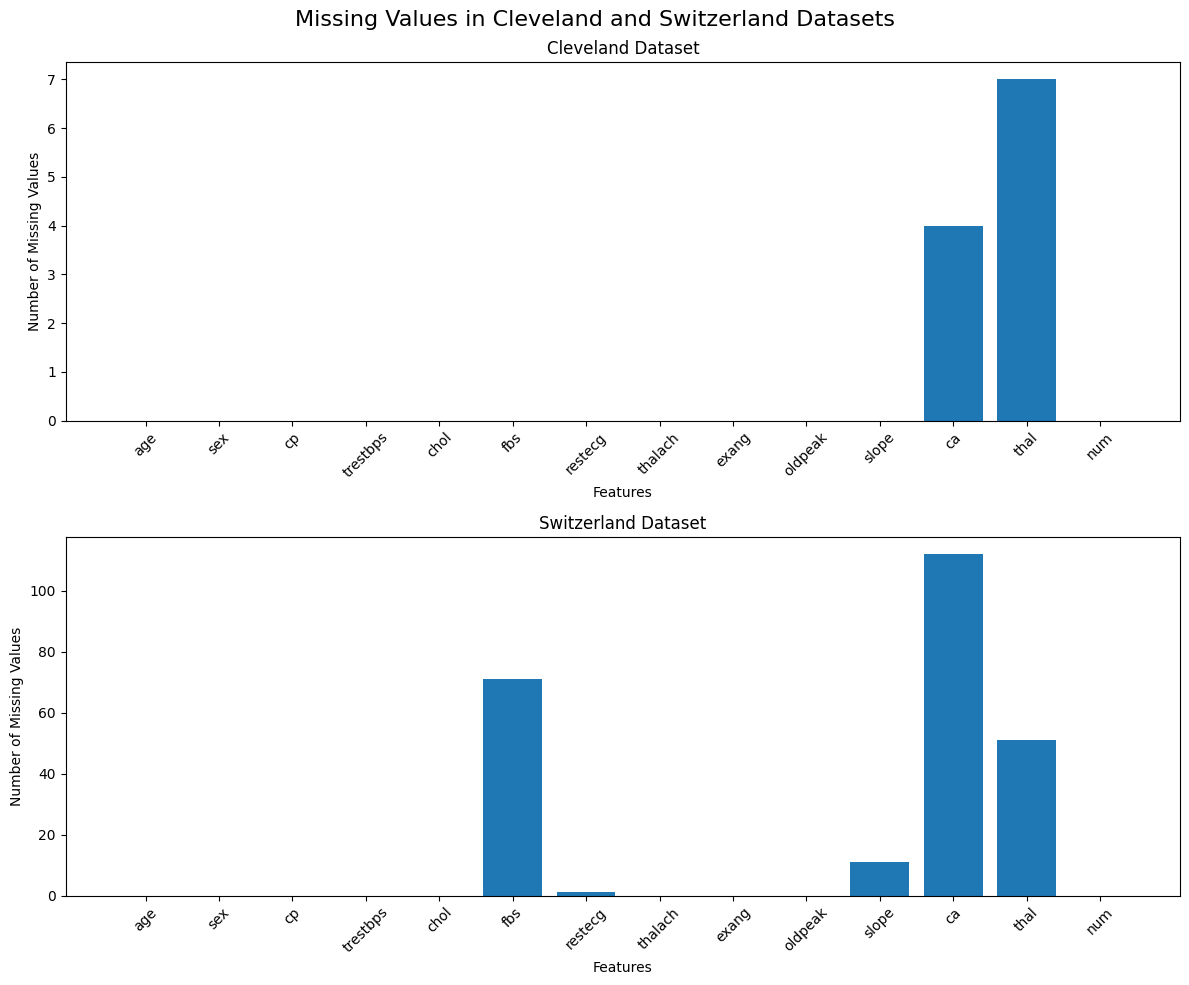

In [33]:
# Write your code here

import matplotlib.pyplot as plt

# Replace any non-numeric values such as '?' or '!' with NaN in both datasets
cleveland.replace(['?', '!'], pd.NA, inplace=True)
test.replace(['?', '!'], pd.NA, inplace=True)

# Function to count missing values
def count_missing(df):
    return df.isnull().sum()

# Function to calculate missing values
def calculating_missing_values(dataframe, zero_columns=['age', 'trestbps', 'thalach']):
    question_mark_missing = (dataframe == "?").sum(axis=0)
    exclamation_mark_missing = (dataframe == "!").sum(axis=0)
    neg_floating_missing = (dataframe == -9.0).sum(axis=0)
    nan_missing = dataframe.isnull().sum()
    zero_missing = (dataframe[zero_columns] <= 0).sum(axis=0)
    age_ceiling_missing = (dataframe['age'] > 140).sum(axis=0)

    # Calculating total missing values per column
    total_missing = question_mark_missing + neg_floating_missing + nan_missing + exclamation_mark_missing
    
    for col in zero_columns:
        if col == "age":
            total_missing[col] += age_ceiling_missing
        total_missing[col] += zero_missing[col]

    return total_missing

# Calculating missing values for each dataset
missing_values_cleveland = calculating_missing_values(cleveland)
missing_values_test = calculating_missing_values(test)





# Plotting the missing values and their percentages
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
fig.suptitle('Missing Values in Cleveland and Switzerland Datasets', fontsize=16)

# Subplot 1: Cleveland dataset
missing_values_cleveland = count_missing(cleveland)
ax1.bar(missing_cleveland.index, missing_cleveland.values)
ax1.set_title('Cleveland Dataset')
ax1.set_xlabel('Features')
ax1.set_ylabel('Number of Missing Values')
ax1.tick_params(axis='x', rotation=45)

# Subplot 2: Switzerland dataset
missing_values_test = count_missing(test)
ax2.bar(missing_switzerland.index, missing_switzerland.values)
ax2.set_title('Switzerland Dataset')
ax2.set_xlabel('Features')
ax2.set_ylabel('Number of Missing Values')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [9]:
# Define categorical columns based on the description
categorical_columns = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

# Set the correct data types for categorical columns
for column in categorical_columns:
    if column in cleveland.columns:
        cleveland[column] = cleveland[column].astype('object')

# Set numerical data types for the rest of the columns
numerical_columns = [col for col in cleveland.columns if col not in categorical_columns]
for column in numerical_columns:
    cleveland[column] = pd.to_numeric(cleveland[column], errors='coerce')

# Display the first few rows and the data types to verify
print(cleveland.head())
print(cleveland.dtypes)

    age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak slope  \
0  63.0  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   3.0   
1  67.0  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   2.0   
2  67.0  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   2.0   
3  37.0  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   3.0   
4  41.0  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   1.0   

    ca thal  num  
0  0.0  6.0    0  
1  3.0  3.0    2  
2  2.0  7.0    1  
3  0.0  3.0    0  
4  0.0  3.0    0  
age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
num           int64
dtype: object


### ` Task: Split the cleveland dataframe in a train and a validation set. `

The train set must be called train, the the validation set must be called val. The size of the validation set must be 30% of the total size of the cleveland dataframe. Use shuffle=True and stratify=True. Make sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into X and y, where X contains the features and y contains the target variable (last column)
X = cleveland.iloc[:, :-1]
y = cleveland.iloc[:, -1]

#X_test = test.iloc[:, :-1]
#y_test = test.iloc[:, :-1]

# Split the cleveland dataframe into train and validation sets (70% train, 30% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y)

# Reset the indexes of both train and validation dataframes
X_train.reset_index(drop=True, inplace=True)
X_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

# Combine features and target back into train and validation dataframes
#train = pd.concat([X_train, y_train], axis=1)
#val = pd.concat([X_val, y_val], axis=1)

# Reset the indexes of both train and validation dataframes
#train.reset_index(drop=True, inplace=True)
#val.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the splits and transformations
#print(train.head())
#print(val.head())


In [11]:
from sklearn.model_selection import train_test_split

#X_train, X_val, y_train, y_val = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [12]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,65.0,1.0,4.0,110.0,248.0,0.0,2.0,158.0,0.0,0.6,1.0,2.0,6.0
1,51.0,0.0,3.0,130.0,256.0,0.0,2.0,149.0,0.0,0.5,1.0,0.0,3.0
2,43.0,1.0,3.0,130.0,315.0,0.0,0.0,162.0,0.0,1.9,1.0,1.0,3.0
3,44.0,1.0,2.0,130.0,219.0,0.0,2.0,188.0,0.0,0.0,1.0,0.0,3.0
4,40.0,1.0,1.0,140.0,199.0,0.0,0.0,178.0,1.0,1.4,1.0,0.0,7.0


In [13]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0
1,45.0,0.0,2.0,130.0,234.0,0.0,2.0,175.0,0.0,0.6,2.0,0.0,3.0
2,54.0,1.0,3.0,120.0,258.0,0.0,2.0,147.0,0.0,0.4,2.0,0.0,7.0
3,63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0
4,52.0,1.0,1.0,152.0,298.0,1.0,0.0,178.0,0.0,1.2,2.0,0.0,7.0


In [14]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.

# Transform target variable to binary for train and validation sets
y_train = y_train.apply(lambda x: 1 if x != 0 else 0)
y_val = y_val.apply(lambda x: 1 if x != 0 else 0)

# Transform target variable to binary for the test set
y_test = test['num'].apply(lambda x: 1 if x != 0 else 0)

# Display the first few rows to verify the transformation
print(y_train.head(10))
print(y_val.head(10))
print(y_test.head(10))



0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    1
Name: num, dtype: int64
0    1
1    0
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    1
Name: num, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: num, dtype: int64


In [15]:
# DO NOT DELETE/CHANGE THIS CELL

'''
train_set_from_franco = pd.read_csv('../../../testing_data/train.csv')
val_set_from_franco = pd.read_csv('../../../testing_data/val.csv')

assert train.equals(train_set_from_franco), 'train set is not correct'
assert val.equals(val_set_from_franco), 'validation set is not correct'
'''


"\ntrain_set_from_franco = pd.read_csv('../../../testing_data/train.csv')\nval_set_from_franco = pd.read_csv('../../../testing_data/val.csv')\n\nassert train.equals(train_set_from_franco), 'train set is not correct'\nassert val.equals(val_set_from_franco), 'validation set is not correct'\n"

### ` Task: impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [16]:
# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer



# Convert all columns in the Cleveland dataset to numeric data types (coercing errors to NaN)
cleveland = cleveland.apply(pd.to_numeric, errors='coerce')

# Select categorical columns in the dataset
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
train_cat = X_train[categorical_columns]

#Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
val_cat = X_val[categorical_columns]

#Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
test_cat = test[categorical_columns]

# Convert all categorical subsets to numeric values
train_cat = train_cat.apply(pd.to_numeric, errors='coerce')
val_cat = val_cat.apply(pd.to_numeric, errors='coerce')
test_cat = test_cat.apply(pd.to_numeric, errors='coerce')

# Impute the three datasets using a KNN imputer with k=5 and weights set to distance
imputer = KNNImputer(n_neighbors=5, weights='distance')
train_imputed_knn = pd.DataFrame(imputer.fit_transform(train_cat), columns=categorical_columns)
val_imputed_knn = pd.DataFrame(imputer.transform(val_cat), columns=categorical_columns)
test_imputed_knn = pd.DataFrame(imputer.transform(test_cat), columns=categorical_columns)

# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.

# 6. Approximate the imputed values to the nearest value in the original dataset for each column
# Ensure original values are numeric and sorted for easier approximation
original_values = {col: np.sort(pd.to_numeric(X_train[col], errors='coerce').dropna().unique()) for col in categorical_columns}

# Define function to approximate the imputed value to the nearest value in the original dataset
def approximate_to_nearest(value, original_vals):
    if pd.isna(value):
        return value
    distances = {float(orig_val): abs(value - float(orig_val)) for orig_val in original_vals}
    min_distance = min(distances.values())
    nearest_values = [val for val, dist in distances.items() if dist == min_distance]
    return max(nearest_values)

# Apply the approximation function to each imputed dataset
for col in categorical_columns:
    train_imputed_knn[col] = train_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, original_values[col]))
    val_imputed_knn[col] = val_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, original_values[col]))
    test_imputed_knn[col] = test_imputed_knn[col].apply(lambda x: approximate_to_nearest(x, original_values[col]))

# Display the first few rows to verify the imputation
print(train_imputed_knn.head(20))
print(val_imputed_knn.head(20))
print(test_imputed_knn.head(20))

print("Number of missing values in train_imputed_knn:", train_imputed_knn.isna().sum().sum()) #ASK QUESTION ABOUT THIS

print("Number of missing values in val_imputed_knn:", val_imputed_knn.isna().sum().sum()) #ASK QUESTION ABOUT THIS

print("Number of missing values in test_imputed_knn:", test_imputed_knn.isna().sum().sum()) #ASK QUESTION ABOUT THIS





    sex   cp  fbs  restecg  exang  slope   ca  thal
0   1.0  4.0  0.0      2.0    0.0    1.0  2.0   6.0
1   0.0  3.0  0.0      2.0    0.0    1.0  0.0   3.0
2   1.0  3.0  0.0      0.0    0.0    1.0  1.0   3.0
3   1.0  2.0  0.0      2.0    0.0    1.0  0.0   3.0
4   1.0  1.0  0.0      0.0    1.0    1.0  0.0   7.0
5   0.0  2.0  0.0      0.0    0.0    1.0  1.0   3.0
6   0.0  2.0  0.0      0.0    0.0    1.0  2.0   3.0
7   0.0  4.0  0.0      0.0    0.0    2.0  0.0   3.0
8   1.0  4.0  0.0      0.0    0.0    1.0  0.0   3.0
9   1.0  4.0  0.0      2.0    0.0    2.0  2.0   6.0
10  1.0  3.0  0.0      0.0    0.0    2.0  0.0   3.0
11  1.0  3.0  1.0      0.0    0.0    2.0  1.0   6.0
12  0.0  3.0  0.0      0.0    0.0    2.0  1.0   3.0
13  1.0  4.0  0.0      2.0    1.0    1.0  1.0   3.0
14  1.0  4.0  0.0      2.0    1.0    2.0  2.0   3.0
15  0.0  4.0  0.0      2.0    0.0    3.0  2.0   3.0
16  0.0  3.0  0.0      0.0    0.0    2.0  0.0   3.0
17  0.0  4.0  0.0      2.0    0.0    2.0  0.0   3.0
18  1.0  2.0

In [17]:
# DO NOT DELETE/CHANGE THIS CELL


'''
train_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')
val_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')
test_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')

assert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'
assert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'
assert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'
'''



"\ntrain_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')\nval_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')\ntest_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')\n\nassert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'\nassert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'\nassert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'\n"

## *4.* Imputing numerical variables

### ` Task: impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

Exclude the columns with missing values when fitting your regressor: only train on columns without missing values. After a column has been imputed, it can be used to fit the regressor in the next step.

In [18]:
# 1. Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

from sklearn.linear_model import Lasso

# Write your code here



# Select numerical columns in the dataset that need to be imputed
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create subsets of train, val, and test datasets with only numerical columns
train_num = X_train[numerical_columns] #include categorical values
val_num = X_val[numerical_columns]
test_num = test[numerical_columns]

# Function to impute missing values in numerical columns using Lasso regression
def impute_numerical_with_lasso(train_data, val_data, test_data, columns):
    # Creating copies of the input datasets
    train_imputed = train_data.copy()
    val_imputed = val_data.copy()
    test_imputed = test_data.copy()

    # Iterate through each numerical column sorted by the number of missing values
    for col in sorted(columns, key=lambda x: train_data[x].isna().sum()):
        if train_data[col].isna().sum() > 0:
            # Split data into missing and non-missing subsets for training
            train_not_missing = train_imputed[train_imputed[col].notna()]
            train_missing = train_imputed[train_imputed[col].isna()]
            val_missing = val_imputed[val_imputed[col].isna()]
            test_missing = test_imputed[test_imputed[col].isna()]

            # Prepare features for Lasso regression by excluding the target column
            # Fill missing values in features with median to ensure completeness
            features = train_not_missing.drop(columns=[col]).fillna(train_imputed.median())
            target = train_not_missing.loc[features.index, col]

            # Fit Lasso regression to predict missing values
            lasso = Lasso(alpha=0.1, max_iter=10000)
            lasso.fit(features, target)

            # Impute missing values in train, val, and test sets
            if not train_missing.empty:
                train_missing_features = train_missing.drop(columns=[col]).fillna(train_imputed.median())
                train_imputed.loc[train_missing.index, col] = lasso.predict(train_missing_features)

            if not val_missing.empty:
                val_missing_features = val_missing.drop(columns=[col]).fillna(train_imputed.median())
                val_imputed.loc[val_missing.index, col] = lasso.predict(val_missing_features)

            if not test_missing.empty:
                test_missing_features = test_missing.drop(columns=[col]).fillna(train_imputed.median())
                test_imputed.loc[test_missing.index, col] = lasso.predict(test_missing_features)

    return train_imputed, val_imputed, test_imputed

# Impute the missing values for numerical columns
train_imputed_lasso, val_imputed_lasso, test_imputed_lasso = impute_numerical_with_lasso(train_num, val_num, test_num, numerical_columns)

# Print only the imputed numerical columns for train, val, and test datasets
print("Train Numerical Columns Imputed:")
print(train_imputed_lasso.head(20))

print("\nValidation Numerical Columns Imputed:")
print(val_imputed_lasso.head(20))

print("\nTest Numerical Columns Imputed:")
print(test_imputed_lasso.head(20))


# Check for remaining missing values in the test dataset
print("Number of missing values in train_imputed_lasso:", train_imputed_lasso.isna().sum().sum()) #ASK QUESTION ABOUT THIS

print("Number of missing values in val_imputed_lasso:", val_imputed_lasso.isna().sum().sum()) #ASK QUESTION ABOUT THIS

print("Number of missing values in test_imputed_lasso:", test_imputed_lasso.isna().sum().sum()) #ASK QUESTION ABOUT THIS


Train Numerical Columns Imputed:
     age  trestbps   chol  thalach  oldpeak
0   65.0     110.0  248.0    158.0      0.6
1   51.0     130.0  256.0    149.0      0.5
2   43.0     130.0  315.0    162.0      1.9
3   44.0     130.0  219.0    188.0      0.0
4   40.0     140.0  199.0    178.0      1.4
5   41.0     105.0  198.0    168.0      0.0
6   71.0     160.0  302.0    162.0      0.4
7   71.0     112.0  149.0    125.0      1.6
8   54.0     140.0  239.0    160.0      1.2
9   64.0     145.0  212.0    132.0      2.0
10  46.0     150.0  231.0    147.0      3.6
11  59.0     126.0  218.0    134.0      2.2
12  44.0     118.0  242.0    149.0      0.3
13  66.0     112.0  212.0    132.0      0.1
14  67.0     100.0  299.0    125.0      0.9
15  62.0     140.0  268.0    160.0      3.6
16  44.0     108.0  141.0    175.0      0.6
17  58.0     100.0  248.0    122.0      1.0
18  57.0     124.0  261.0    141.0      0.3
19  49.0     134.0  271.0    162.0      0.0

Validation Numerical Columns Imputed:
    

In [19]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')
val_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')
test_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')

assert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'
assert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'
assert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'
'''

"\ntrain_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')\nval_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')\ntest_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')\n\nassert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'\nassert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'\nassert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'\n"

## *5.* Classification with Decision Tree, using a single split 

In [20]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

# Write your code here

# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
X_train_imputed = pd.merge(train_imputed_knn, train_imputed_lasso, left_index=True, right_index=True)

# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
X_val_imputed = pd.merge(val_imputed_knn, val_imputed_lasso, left_index=True, right_index=True)

# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.
X_test_imputed = pd.merge(test_imputed_knn, test_imputed_lasso, left_index=True, right_index=True)

# Display the first few rows to verify the merging
print(X_train_imputed.head())
print(X_val_imputed.head())
print(X_test_imputed.head())








   sex   cp  fbs  restecg  exang  slope   ca  thal   age  trestbps   chol  \
0  1.0  4.0  0.0      2.0    0.0    1.0  2.0   6.0  65.0     110.0  248.0   
1  0.0  3.0  0.0      2.0    0.0    1.0  0.0   3.0  51.0     130.0  256.0   
2  1.0  3.0  0.0      0.0    0.0    1.0  1.0   3.0  43.0     130.0  315.0   
3  1.0  2.0  0.0      2.0    0.0    1.0  0.0   3.0  44.0     130.0  219.0   
4  1.0  1.0  0.0      0.0    1.0    1.0  0.0   7.0  40.0     140.0  199.0   

   thalach  oldpeak  
0    158.0      0.6  
1    149.0      0.5  
2    162.0      1.9  
3    188.0      0.0  
4    178.0      1.4  
   sex   cp  fbs  restecg  exang  slope   ca  thal   age  trestbps   chol  \
0  0.0  2.0  0.0      2.0    0.0    2.0  1.0   3.0  57.0     130.0  236.0   
1  0.0  2.0  0.0      2.0    0.0    2.0  0.0   3.0  45.0     130.0  234.0   
2  1.0  3.0  0.0      2.0    0.0    2.0  0.0   7.0  54.0     120.0  258.0   
3  1.0  4.0  1.0      2.0    1.0    1.0  3.0   7.0  63.0     130.0  330.0   
4  1.0  1.0  1.0    

In [21]:
print("Number of missing values in X_train:", X_train_imputed.isna().sum().sum())
print("Number of missing values in X_val:", X_val_imputed.isna().sum().sum())
print("Number of missing values in X_test:", X_test_imputed.isna().sum().sum())

Number of missing values in X_train: 0
Number of missing values in X_val: 0
Number of missing values in X_test: 0


### ` Task: Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [22]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

# Import necessary modules
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time  

# Step 1: Create a dictionary to contain the hyperparameters
hyperparameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model
performance = {}

# Create a ParameterGrid object with the hyperparameters from the dictionary
param_grid = ParameterGrid(hyperparameters)

# Step 4: Hyperparameter tuning
start = time.time()  # DO NOT CHANGE/DELETE THIS LINE

for params in param_grid:
    model = DecisionTreeClassifier(**params)
    
    # Fit the model
    model.fit(X_train_imputed, y_train)
    
    # Predict the target variable for the validation set
    y_pred = model.predict(X_val_imputed)
    
    # Calculate the F1 score of the model
    f1 = f1_score(y_val, y_pred, average='weighted')
    
    # Add the hyperparameters and the F1 score to the performance dictionary
    performance[tuple(params.items())] = f1

end = time.time()  # DO NOT CHANGE/DELETE THIS LINE

# Print the time elapsed
print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start)  # DO NOT CHANGE/DELETE THIS LINE

# Print performance results
#print("Performance of Different Hyperparameter Combinations:")
#for params, f1_score_value in performance.items():
#    print(f"Params: {params}, F1 Score: {f1_score_value:.4f}")

Time elapsed to run the hyperparameter tuning with a single split:  0.025641918182373047


In [23]:
# select the best performing hyperparameters
best_hyperparameters = max(performance, key=performance.get)

best_hyperparameters

(('criterion', 'entropy'), ('max_depth', 3), ('min_samples_split', 2))

In [24]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.

# Check the shapes of the datasets
print("Shape of X_train_imputed:", X_train_imputed.shape)
print("Shape of X_val_imputed:", X_val_imputed.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

print("Shape of X_test_imputed:", X_test_imputed.shape)
print("Shape of y_test:", y_test.shape)

# Check for inconsistent indices and realign if necessary
# Align indices between X_test_imputed and y_test
#X_test_imputed, y_test = X_test_imputed.align(y_test, join='inner', axis=0)

# After realignment, re-check the shape
print("After alignment:")
print("Shape of X_test_imputed:", X_test_imputed.shape)
print("Shape of y_test:", y_test.shape)

# Concatenate train and validation datasets properly to create X and y
X = pd.concat([X_train_imputed, X_val_imputed], axis=0)
y = pd.concat([y_train, y_val], axis=0)

# Re-check shapes after alignment
print("After alignment of train/val data:")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


print("Number of missing values in X before handling:", X.isna().sum().sum()) 
print("Number of missing values in y before handling:", y.isna().sum().sum())

# Create a DecisionTreeClassifier with the best hyperparameters
# Fit the model on the X and y datasets


# Write your code here

# Find the best hyperparameters based on performance
best_params = max(performance, key=performance.get)  # Get the parameters with the highest F1 score
best_params_dict = dict(best_params)  # Convert tuple to dictionary

# Create a DecisionTreeClassifier with the best hyperparameters
best_model = DecisionTreeClassifier(**best_params_dict)

# Fit the model on the combined train and validation datasets (X and y)
best_model.fit(X, y)

# Predict the target variable for the test dataset.
y_test_pred = best_model.predict(X_test_imputed)

# Write your code here

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.
f1_test_single_split = f1_score(y_test, y_test_pred, average='weighted')





Shape of X_train_imputed: (212, 13)
Shape of X_val_imputed: (91, 13)
Shape of y_train: (212,)
Shape of y_val: (91,)
Shape of X_test_imputed: (117, 13)
Shape of y_test: (117,)
After alignment:
Shape of X_test_imputed: (117, 13)
Shape of y_test: (117,)
After alignment of train/val data:
Shape of X: (303, 13)
Shape of y: (303,)
Number of missing values in X before handling: 0
Number of missing values in y before handling: 0


In [25]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

0.8328532309114833

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [26]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

# Create a StratifiedKFold object
CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a dictionary to store the performance
performance_CV = {}

# Create a ParameterGrid object
param_grid_CV = ParameterGrid(hyperparameters)

start_CV = time.time()  # DO NOT CHANGE/DELETE THIS LINE

# Iterate over the folds of the StratifiedKFold
for i, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    
    # Iterate over the combinations of hyperparameters
    for params in param_grid_CV:
        # Create and train the DecisionTreeClassifier
        model = DecisionTreeClassifier(**params)
        model.fit(X_train, y_train)

        # Predict the target variable for the validation fold
        y_pred = model.predict(X_val)

        # Calculate the F1 score of the model
        f1 = f1_score(y_val, y_pred, average='weighted')

        # Add the hyperparameters and the F1 score to the performance dictionary
        if tuple(params.items()) not in performance_CV:
            performance_CV[tuple(params.items())] = []
        performance_CV[tuple(params.items())].append(f1)

end_CV = time.time()  # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV)  # DO NOT CHANGE/DELETE THIS LINE

# Print the performance dictionary for Cross Validation
print(performance_CV)  # Optional: View the F1 scores for each combination across folds


Time elapsed to run the hyperparameter tuning with Cross Validation:  0.11493611335754395
{(('criterion', 'gini'), ('max_depth', 3), ('min_samples_split', 2)): [0.7865382476588741, 0.8184886832797643, 0.8344442442803099, 0.6725347323423686, 0.8298611111111112], (('criterion', 'gini'), ('max_depth', 3), ('min_samples_split', 5)): [0.7865382476588741, 0.8184886832797643, 0.8344442442803099, 0.6725347323423686, 0.8298611111111112], (('criterion', 'gini'), ('max_depth', 3), ('min_samples_split', 10)): [0.7865382476588741, 0.8184886832797643, 0.8344442442803099, 0.6725347323423686, 0.8298611111111112], (('criterion', 'gini'), ('max_depth', 5), ('min_samples_split', 2)): [0.7381288863764839, 0.7707385862859157, 0.7524845681087696, 0.647930160518164, 0.6674107142857143], (('criterion', 'gini'), ('max_depth', 5), ('min_samples_split', 5)): [0.7217613358207968, 0.7707385862859157, 0.7524845681087696, 0.647930160518164, 0.6508771929824562], (('criterion', 'gini'), ('max_depth', 5), ('min_samples

In [27]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
best_hyperparameters_CV = max(performance_CV, key=lambda k: sum(performance_CV[k]) / len(performance_CV[k]))

best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE

(('criterion', 'entropy'), ('max_depth', 3), ('min_samples_split', 2))

In [28]:
print(X.columns)
print(X_test_imputed.columns)
print(X.head())


Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age',
       'trestbps', 'chol', 'thalach', 'oldpeak'],
      dtype='object')
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age',
       'trestbps', 'chol', 'thalach', 'oldpeak'],
      dtype='object')
   sex   cp  fbs  restecg  exang  slope   ca  thal   age  trestbps   chol  \
0  1.0  4.0  0.0      2.0    0.0    1.0  2.0   6.0  65.0     110.0  248.0   
1  0.0  3.0  0.0      2.0    0.0    1.0  0.0   3.0  51.0     130.0  256.0   
2  1.0  3.0  0.0      0.0    0.0    1.0  1.0   3.0  43.0     130.0  315.0   
3  1.0  2.0  0.0      2.0    0.0    1.0  0.0   3.0  44.0     130.0  219.0   
4  1.0  1.0  0.0      0.0    1.0    1.0  0.0   7.0  40.0     140.0  199.0   

   thalach  oldpeak  
0    158.0      0.6  
1    149.0      0.5  
2    162.0      1.9  
3    188.0      0.0  
4    178.0      1.4  


In [29]:
print(X.dtypes)
print(X_test_imputed.dtypes)


sex         float64
cp          float64
fbs         float64
restecg     float64
exang       float64
slope       float64
ca          float64
thal        float64
age         float64
trestbps    float64
chol        float64
thalach     float64
oldpeak     float64
dtype: object
sex         float64
cp          float64
fbs         float64
restecg     float64
exang       float64
slope       float64
ca          float64
thal        float64
age         float64
trestbps    float64
chol        float64
thalach     float64
oldpeak     float64
dtype: object


In [30]:
# Convert best_hyperparameters_CV to a dictionary
best_hyperparameters_CV = dict(best_hyperparameters_CV)

# Create a DecisionTreeClassifier with the best hyperparameters (CV)
final_tree = DecisionTreeClassifier(**best_hyperparameters_CV)

# Fit the model on the X and y datasets
final_tree.fit(X, y)

# Predict the target variable for the test dataset
y_test_pred_CV = final_tree.predict(X_test_imputed)

# Calculate the F1 score of the model on the test dataset
f1_test_CV = f1_score(y_test, y_test_pred_CV, average='weighted')
print('F1 score on the test dataset (CV):', f1_test_CV)


F1 score on the test dataset (CV): 0.8328532309114833


In [31]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

0.8328532309114833

### Interpretation of F1 Score
The F1 score provides a balance between precision and recall. A higher F1 score on the test set indicates better model performance. Compare this score with the training set to check for overfitting or underfitting.

## *7.* Interpretation of the results 

### ` Task: Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

The time elapsed with cross-validation (0.1067960262298584) is significantly higher than the time elapsed with a single split (0.02043008804321289) because CV repeats training on multiple folds (subsets) to evaluate model performance more thoroughly. In contrast, a single split involves training once, making it much faster.

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

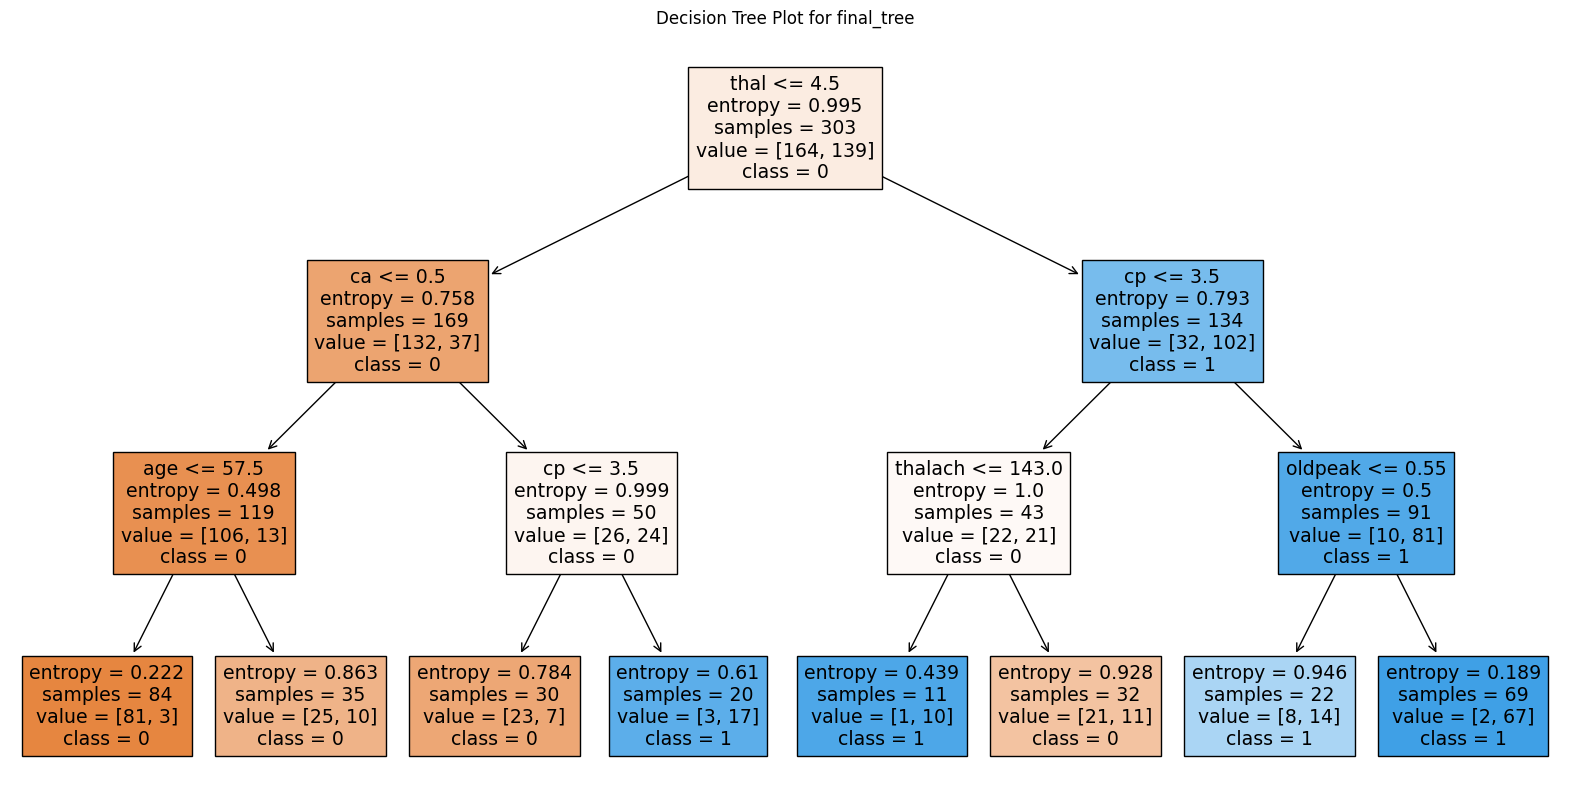

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size for readability
plot_tree(final_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree Plot for final_tree")
plt.show()


In the plotted decision tree, the feature 'thal' at the root node is the most relevant. This indicates 'thal' is the most impactful feature for predicting the target variable in this model.

### ` Question: In this assignment we did not standardize our data. Why is that? Explain it in 50 words or less.`

We didn't need to standardize for this assingment because decision trees are unaffected by whether the data is in its original scale or standardized. They split based on the order of feature values, not their magnitude. Thus, scaling has no impact on decision boundaries.